<center><h2>EDA on Crime Dataset</h2></center>

<a id='1'></a>
### Import Standard Libraries 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [32]:
crime_df = pd.read_csv('Crime_Incidents_data.csv')
crime_df.head()

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET DIRECTION,...,CITY,STATE,ZIP CODE,DISTRICT,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION
0,NaN,04/11/2020,1645,SEXUAL ASSAULT,COMMITTED,14:43.1,BATT/SEXUAL,NaN,NaN,NaN,...,NaN,NaN,70802.0,2,C,1,2C1,10.0,NONE,NaN
1,NaN,10/28/2019,2248,JUVENILE,COMMITTED,14:81,IND BEHAVIOR W/JUV,NaN,NaN,NaN,...,NaN,NaN,70807.0,4,B,3,4B3,2.0,NONE,NaN
2,NaN,11/05/2019,537,SEXUAL ASSAULT,COMMITTED,14:43.1,BATT/SEXUAL,NaN,NaN,NaN,...,NaN,NaN,70802.0,1,A,1,1A1,10.0,NONE,NaN
3,NaN,11/09/2019,2345,SEXUAL ASSAULT,ATTEMPTED,14:42.1/B,RAPE/ATT FORCIBLE,NaN,NaN,NaN,...,NaN,NaN,70816.0,3,E,5,3E5,8.0,NONE,NaN
4,NaN,03/14/2020,1657,JUVENILE,COMMITTED,14:81,IND BEHAVIOR W/JUV,NaN,NaN,NaN,...,NaN,NaN,70805.0,NaN,NaN,NaN,NaN,7.0,NONE,NaN


Let's see the different columns available, number of records, null values if any

In [33]:
crime_df.columns

Index(['FILE NUMBER', 'OFFENSE DATE', 'OFFENSE TIME', 'CRIME', 'COMMITTED',
       'OFFENSE', 'OFFENSE DESCRIPTION', 'FULL ADDRESS', 'ADDRESS NUMBER',
       'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'CITY', 'STATE',
       'ZIP CODE', 'DISTRICT', 'ZONE', 'SUBZONE', 'COMPLETE DISTRICT',
       'COUNCIL DISTRICT', 'CRIME PREVENTION DISTRICT', 'GEOLOCATION'],
      dtype='object')

In [34]:
crime_df.shape

(490578, 22)

So this dataset contains around `500K` records spanned across `22` columns.

In [35]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490578 entries, 0 to 490577
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   FILE NUMBER                483265 non-null  float64
 1   OFFENSE DATE               490578 non-null  object 
 2   OFFENSE TIME               490578 non-null  object 
 3   CRIME                      490578 non-null  object 
 4   COMMITTED                  490578 non-null  object 
 5   OFFENSE                    490578 non-null  object 
 6   OFFENSE DESCRIPTION        490578 non-null  object 
 7   FULL ADDRESS               483265 non-null  object 
 8   ADDRESS NUMBER             482448 non-null  float64
 9   STREET DIRECTION           80244 non-null   object 
 10  STREET NAME                483265 non-null  object 
 11  STREET TYPE                466665 non-null  object 
 12  CITY                       483265 non-null  object 
 13  STATE                      48

[Index](#Index)
<a id='2'></a>
### Dealing with Null values

In [36]:
crime_df.isnull().values.any()

True

So we've null values present in this dataset, we'll calculate how many(%) null values are there in each column.

In [37]:
crime_df.isna().sum() / len(crime_df) * 100

FILE NUMBER                   1.490691
OFFENSE DATE                  0.000000
OFFENSE TIME                  0.000000
CRIME                         0.000000
COMMITTED                     0.000000
OFFENSE                       0.000000
OFFENSE DESCRIPTION           0.000000
FULL ADDRESS                  1.490691
ADDRESS NUMBER                1.657229
STREET DIRECTION             83.642968
STREET NAME                   1.490691
STREET TYPE                   4.874454
CITY                          1.490691
STATE                         1.490691
ZIP CODE                      0.621104
DISTRICT                      4.713216
ZONE                          4.713216
SUBZONE                       4.713216
COMPLETE DISTRICT             4.713216
COUNCIL DISTRICT              0.675734
CRIME PREVENTION DISTRICT     0.673695
GEOLOCATION                   1.490691
dtype: float64

Few columns have null values from 0.5 to 1.5%, other few have upto 5%, whereas `STREET DIRECTION` column has most null values which is 83.6% of the total records.<br><br>
Dropping the `STREET DIRECTION` column cause it contains most null values, which makes it less useful, and storing it in a different variable so we can have a reference to the original dataframe.

In [38]:
crime_df2 = crime_df.drop('STREET DIRECTION', axis=1)

In [39]:
crime_df2 = crime_df2.dropna(axis=0)

In [40]:
crime_df2.shape

(442300, 21)

In [41]:
crime_df2.isnull().values.any()

False

Checking for duplicate values if any

In [42]:
crime_df2.duplicated().sum()

7

In [43]:
crime_df2 = crime_df2.drop_duplicates()
crime_df2 = crime_df2.reset_index(drop=True)

In [44]:
crime_df2.duplicated().sum()

0

Now we don't have any null or duplicated values so we can proceed further on exploring the dataset in depth.

<a id='3'></a>
[Index](#Index)
### Exploring Data

In [45]:
crime_df2.head()

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,...,CITY,STATE,ZIP CODE,DISTRICT,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION
0,1.900120e+09,12/01/2019,0,THEFT,COMMITTED,13:67,THEFT/MISD/CC,10391 AIRLINE HW,10391.0,AIRLINE,...,BATON ROUGE,LA,70816.0,3,C,3,3C3,8.0,NONE,"10391 AIRLINE HW\nBATON ROUGE, LA 70815"
1,2.000001e+09,01/04/2020,228,OTHER,COMMITTED,11:140,D W I /CC,3400 FLORIDA BL,3400.0,FLORIDA,...,BATON ROUGE,LA,70806.0,1,B,1,1B1,7.0,NONE,"3400 FLORIDA BL\nBATON ROUGE, LA"
2,2.000006e+09,01/18/2020,1940,BATTERY,COMMITTED,14:34.1,BATT/2ND DEGREE,2136 LOBDELL BL,2136.0,LOBDELL,...,BATON ROUGE,LA,70806.0,1,D,2,1D2,6.0,NONE,"2136 LOBDELL BL\nBATON ROUGE, LA 70805"
3,1.300056e+09,06/29/2013,1917,OTHER,COMMITTED,11:140,D W I /CC,200 NORTH I110 HW,200.0,NORTH I-110,...,BATON ROUGE,LA,70802.0,2,A,2,2A2,10.0,NONE,"200 NORTH I110 HW\nBATON ROUGE, LA"
4,2.000010e+09,02/01/2020,1824,OTHER,COMMITTED,14:52,ARSON/SIMPLE,8464 AIRLINE HW,8464.0,AIRLINE,...,BATON ROUGE,LA,70806.0,1,D,2,1D2,6.0,NONE,"8464 AIRLINE HW\nBATON ROUGE, LA 70812"


Let's find out how many different crimes categories are there with their value counts.

In [46]:
crime_categories = crime_df2['CRIME'].value_counts()

In [47]:
fig = px.bar(data_frame=crime_categories, 
             x=crime_categories.keys(), 
             y=crime_categories.values, 
             width=800, 
             height=500, 
             title='CRIME Categories by Count',
             labels={'index': 'CRIME',
                     'y': 'Count'},
             color=crime_categories.values)

fig.update(layout_coloraxis_showscale=False)
fig.show()

So the top most committed crimes other than the sum of `OTHER` category are `THEFT`, `BATTERY`, `NARCOTICS` and so...on

In [48]:
crime_df2['STATE'].value_counts()

LA    442293
Name: STATE, dtype: int64

The `STATE` column only consists one value i.e 'LA' that means this dataset only has records that happened in Los Angeles, USA. 

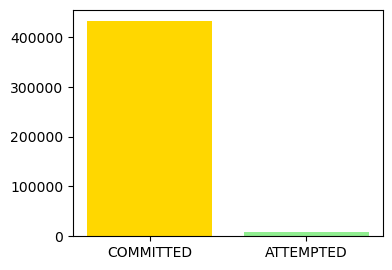

In [49]:
crime_categories2 = crime_df2['COMMITTED'].value_counts()

plt.figure(figsize=(4, 3), dpi=100)
plt.bar(crime_categories2.keys(),
        crime_categories2.values,
        color=['gold', 'lightgreen'])
plt.show()

The above bar chart shows that **88%** of crimes recorded are **committed**, only **12%** of them were going to **attempt** and got caught.

In [50]:
offense_types = crime_df2['OFFENSE DESCRIPTION'].value_counts().sort_values(ascending=False)[:15]

fig = px.bar(x=offense_types.values[::-1],
             y=offense_types.keys()[::-1],
             orientation='h',
             width=800, 
             height=500,
             color=offense_types.values[::-1],
             labels={'x': 'Count',
                     'y': 'OFFENSE'},
             title='Top 15 Offense by Count')

fig.update(layout_coloraxis_showscale=False)
fig.show()

The top most committed offenses are `THEFT`, `THEFT OF VEHICLE`, `DAMAGE TO PROPERTY`, `SHOPLIFTING`, `BURGLARY`, `POSSESSION OF MARIJUANA`. So if anyday you're wandering in the city, make sure to keep an eye on your valuable things.

In [51]:
# identify weekends
def isWeekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return True
    else:
        return False

# identify seasons
def getSeason(row):
    if row.month == 11 or row.month == 0 or row.month == 1:
        return 'Winter'
    elif row.month == 2 or row.month == 3 or row.month == 4:
        return 'Spring'
    elif row.month == 5 or row.month == 6 or row.month == 7:
        return 'Summer'
    else:
        return 'Fall'

# determine the weekend and season from the 'Date' feature and add them to the data frame
df['Weekend'] = df['OFFENSE DATE'].apply(isWeekend)
df['Season'] = df['OFFENSE DATE'].apply(getSeason)

Crimes over the weekdays: 317174
Crimes over the weekends: 125063

Percentage of weekend crimes: 28.279632866539888


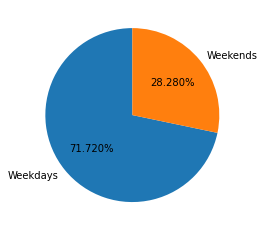

In [52]:
# weekday crimes
weekday_crimes = df['Weekend'].value_counts()[0]
print('Crimes over the weekdays: {}'.format(weekday_crimes))

# weekend crimes
weekend_crimes = df['Weekend'].value_counts()[1]
print('Crimes over the weekends: {}'.format(weekend_crimes))

# percentage of weekend crimes
percentage = (100 * weekend_crimes) / (weekend_crimes + weekday_crimes)
print('\nPercentage of weekend crimes: {}'.format(percentage))

#visualization
plt.pie([weekday_crimes, weekend_crimes], labels = ['Weekdays', 'Weekends'], autopct='%.3f%%',startangle = 90)
plt.show()

<AxesSubplot:>

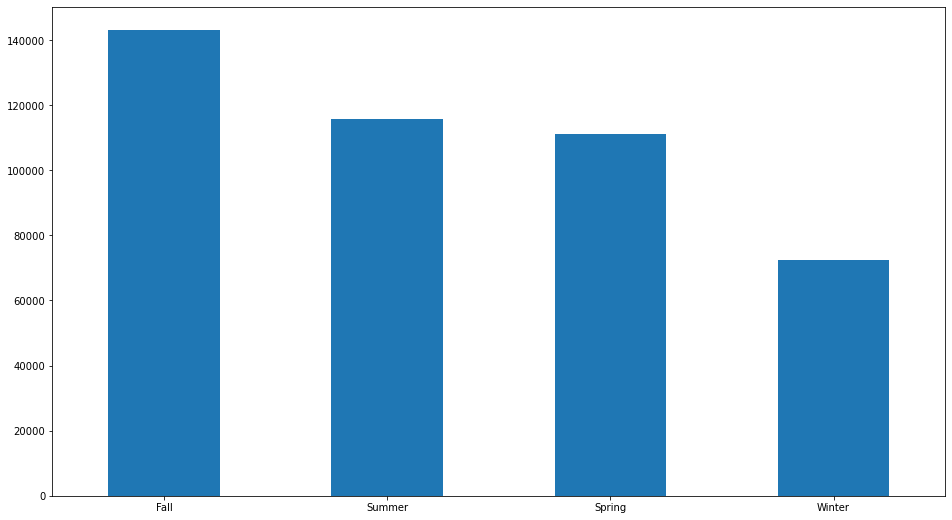

In [53]:
df['Season'].value_counts().plot(kind='bar', figsize=(16, 9), rot = 0)

<AxesSubplot:>

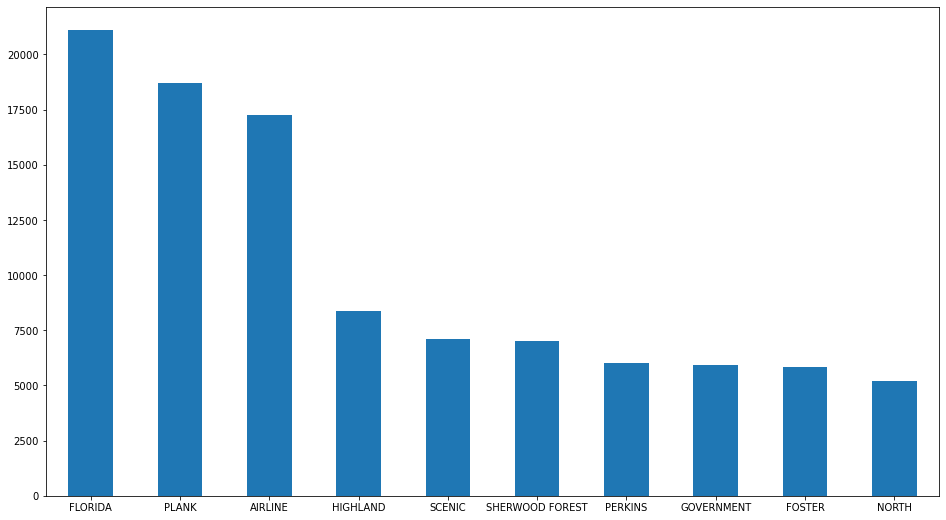

In [54]:
df['STREET NAME'].value_counts().head(10).plot(kind='bar', figsize=(16, 9), rot = 0)

<AxesSubplot:>

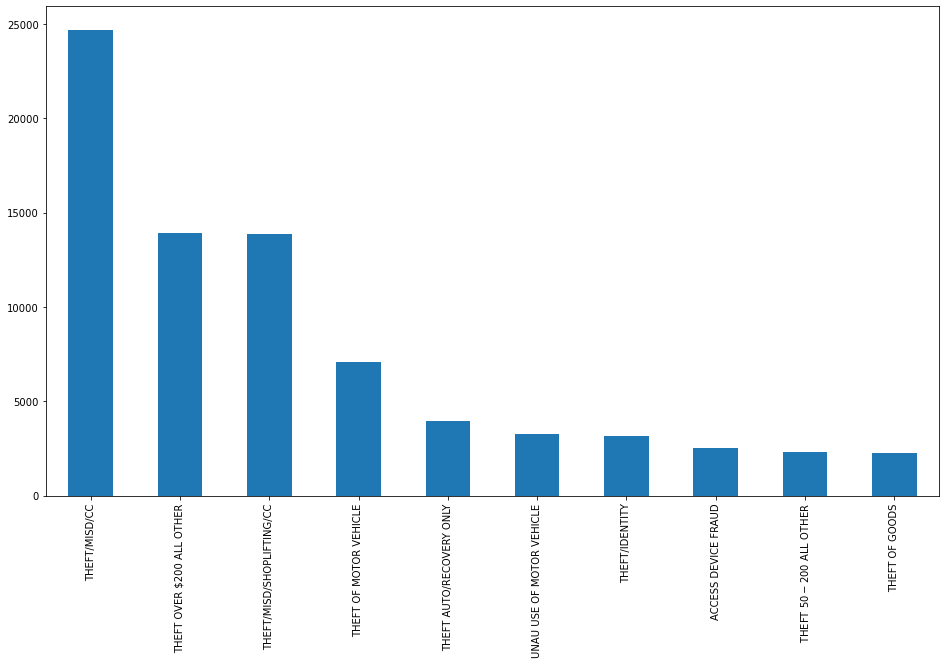

In [55]:
# retrieving all thefts
thefts = df[df['CRIME'] == 'THEFT']

# identifying different categories of theft
thefts_with_categories = thefts['OFFENSE DESCRIPTION'].value_counts().head(10)

# visualization
thefts_with_categories.plot(kind = 'bar', figsize = (16, 9))

[Index](#Index)
<a id='4'></a>
### Time Perspective

In [21]:
crime_df2['OFFENSE DATE'] = pd.to_datetime(crime_df2['OFFENSE DATE'])

Creating separate columns for Day of week, Date, Month, Year from OFFENSE DATE column to analyze from different time perspective.

In [22]:
crime_df2['YEAR'] = crime_df2['OFFENSE DATE'].dt.year
crime_df2['MONTH'] = crime_df2['OFFENSE DATE'].dt.month
crime_df2['DATE'] = crime_df2['OFFENSE DATE'].dt.day
crime_df2['DAY'] = crime_df2['OFFENSE DATE'].dt.weekday

In [23]:
np.min(crime_df2['OFFENSE DATE']), np.max(crime_df2['OFFENSE DATE'])

(Timestamp('2011-01-01 00:00:00'), Timestamp('2021-01-06 00:00:00'))

The dataset we've consists crime records from **Jan-2011** to **Jan-2021**.

In [24]:
crime_df2.head()

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,...,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,YEAR,MONTH,DATE,DAY
0,1.900120e+09,2019-12-01,0,THEFT,COMMITTED,13:67,THEFT/MISD/CC,10391 AIRLINE HW,10391.0,AIRLINE,...,C,3,3C3,8.0,NONE,"10391 AIRLINE HW\nBATON ROUGE, LA 70815",2019,12,1,6
1,2.000001e+09,2020-01-04,228,OTHER,COMMITTED,11:140,D W I /CC,3400 FLORIDA BL,3400.0,FLORIDA,...,B,1,1B1,7.0,NONE,"3400 FLORIDA BL\nBATON ROUGE, LA",2020,1,4,5
2,2.000006e+09,2020-01-18,1940,BATTERY,COMMITTED,14:34.1,BATT/2ND DEGREE,2136 LOBDELL BL,2136.0,LOBDELL,...,D,2,1D2,6.0,NONE,"2136 LOBDELL BL\nBATON ROUGE, LA 70805",2020,1,18,5
3,1.300056e+09,2013-06-29,1917,OTHER,COMMITTED,11:140,D W I /CC,200 NORTH I110 HW,200.0,NORTH I-110,...,A,2,2A2,10.0,NONE,"200 NORTH I110 HW\nBATON ROUGE, LA",2013,6,29,5
4,2.000010e+09,2020-02-01,1824,OTHER,COMMITTED,14:52,ARSON/SIMPLE,8464 AIRLINE HW,8464.0,AIRLINE,...,D,2,1D2,6.0,NONE,"8464 AIRLINE HW\nBATON ROUGE, LA 70812",2020,2,1,5


Day of Week is in integer form i.e starting from Monday-0, Tuesday-1, ..., Saturday-6, Sunday-7, so I wrote a function to convert it into string form.

In [25]:
def convert_weekday(column):
    
    new_weekdays = []
    for c in column:
        if c==0:
            new_weekdays.append('Monday')
        elif c==1:
            new_weekdays.append('Tuesday')
        elif c==2:
            new_weekdays.append('Wednesday')
        elif c==3:
            new_weekdays.append('Thursday')
        elif c==4:
            new_weekdays.append('Friday')
        elif c==5:
            new_weekdays.append('Saturday')
        elif c==6:
            new_weekdays.append('Sunday')
            
    return new_weekdays

In [26]:
crime_df2['DAY'] = convert_weekday(crime_df2['DAY'])

In [27]:
crime_df2.head()

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,...,ZONE,SUBZONE,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,YEAR,MONTH,DATE,DAY
0,1.900120e+09,2019-12-01,0,THEFT,COMMITTED,13:67,THEFT/MISD/CC,10391 AIRLINE HW,10391.0,AIRLINE,...,C,3,3C3,8.0,NONE,"10391 AIRLINE HW\nBATON ROUGE, LA 70815",2019,12,1,Sunday
1,2.000001e+09,2020-01-04,228,OTHER,COMMITTED,11:140,D W I /CC,3400 FLORIDA BL,3400.0,FLORIDA,...,B,1,1B1,7.0,NONE,"3400 FLORIDA BL\nBATON ROUGE, LA",2020,1,4,Saturday
2,2.000006e+09,2020-01-18,1940,BATTERY,COMMITTED,14:34.1,BATT/2ND DEGREE,2136 LOBDELL BL,2136.0,LOBDELL,...,D,2,1D2,6.0,NONE,"2136 LOBDELL BL\nBATON ROUGE, LA 70805",2020,1,18,Saturday
3,1.300056e+09,2013-06-29,1917,OTHER,COMMITTED,11:140,D W I /CC,200 NORTH I110 HW,200.0,NORTH I-110,...,A,2,2A2,10.0,NONE,"200 NORTH I110 HW\nBATON ROUGE, LA",2013,6,29,Saturday
4,2.000010e+09,2020-02-01,1824,OTHER,COMMITTED,14:52,ARSON/SIMPLE,8464 AIRLINE HW,8464.0,AIRLINE,...,D,2,1D2,6.0,NONE,"8464 AIRLINE HW\nBATON ROUGE, LA 70812",2020,2,1,Saturday


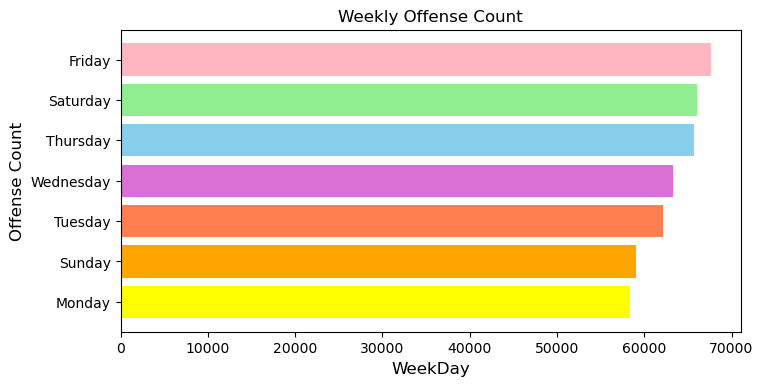

In [28]:
weekly_crimes = crime_df2['DAY'].value_counts().sort_values()

plt.figure(figsize=(8, 4), dpi=100)
plt.barh(weekly_crimes.keys(),
         weekly_crimes.values,
         color=['yellow', 'orange', 'coral', 'orchid', 'skyblue', 'lightgreen', 'lightpink'])
plt.xlabel('WeekDay', size=12)
plt.ylabel('Offense Count', size=12)
plt.title('Weekly Offense Count')
plt.show()

After checking out weekly offense count, for `Thursday`, `Friday` and `Saturday` the count is more as compared to other days which makes sense as most people tend to go out on weekends to socialize, travel to some other place, etc.

I didn't considered 2021 as it had only one month(January) of data.

In [29]:
yearly_count = crime_df2.groupby(by=['YEAR']).count()['MONTH']

fig = px.line(data_frame=yearly_count,
              x=yearly_count.keys()[:-1],
              y=yearly_count.values[:-1],
              height=450,
              width=800,
              labels={'x': 'Year',
                      'y': 'Count'},
              title='Year Wise Trend',
              markers=True)
fig.show()

This line chart we plotted shows us a downward trend in overall number of crimes committed, let's see if this is the same case for individual category of crime.<br><br>
For that we'll need to create a pivot table which will help us to visualize it more clearly.

In [30]:
df = crime_df2[crime_df2['YEAR'] != 2021]
pivot_table = pd.pivot_table(data=df,
                             index='YEAR',
                             values='MONTH',
                             columns='CRIME',
                             aggfunc=np.count_nonzero)
pivot_table

CRIME,ASSAULT,BATTERY,BUSINESS ROBBERY,CRIMINAL DAMAGE TO PROPERTY,FIREARM,HOMICIDE,INDIVIDUAL ROBBERY,NARCOTICS,NON-RESIDENTIAL BURGLARY,NUISANCE,OTHER,RESIDENTIAL BURGLARY,THEFT,VEHICLE BURGLARY,VICE
YEAR,,,,,,,,,,,,,,,
2011,2090,5317,98,4167,1343,400,864,5296,1274,2890,18721,3569,9888,2637,288
2012,1974,5087,116,4121,1297,359,957,5004,1365,1774,15690,2767,9688,2509,249
2013,1740,4124,116,3393,1069,278,736,3793,1215,1167,13195,1895,8555,2431,156
2014,1432,3667,112,2861,1078,308,660,3906,1188,902,11813,1380,8627,1947,147
2015,1623,3909,104,3240,1245,320,573,4209,1188,936,12172,1133,9020,2484,141
2016,1746,3727,107,3450,1598,361,561,3600,1294,809,11294,1060,8973,2317,149
2017,2092,3802,80,3443,2012,472,730,3630,1870,784,11480,1019,10912,2821,130
2018,2058,3624,57,3342,1820,353,614,3893,1995,618,10002,906,10239,2699,153
2019,2138,3487,48,3149,1762,401,544,3123,1781,610,9225,639,10483,2446,175


In [31]:
fig = px.line(data_frame=pivot_table,
              x=pivot_table.index,
              y=pivot_table.keys(),
              height=500,
              width=1000,
              labels={'YEAR': 'Year',
                      'value': 'Crime Count'},
              title='Year & Category Wise Trend',
              markers=True)
fig.show()

**NOTE** - You can zoom in the plot for more clear visual.

The above line chart shows the following patterns:
* Number of crimes termed as `BATTERY`, `BUSINESS ROBBERY`, `CRIMINAL DAMAGE TO PROPERTY`, `INDIVIDUAL BATTERY`, `NARCOTICS`, `NUISANCE`, `RESIDIENCE BURGLARY` have decreased as compared to 5-10 years before.<br>

* Whereas, crimes in `HOMICIDE` and `FIREARM` have increased.<br>

* Irrespective of the category there was a sudden drop in crime rates in 2014.

# Financial Crime Analysis

In [57]:
df1 = df[df['OFFENSE DESCRIPTION'].str.contains("MONEY LAUNDERING")]

In [58]:
df2 = df[df['OFFENSE DESCRIPTION'].str.contains("BRIBERY")]

In [59]:
df3 = df[df['OFFENSE DESCRIPTION'].str.contains("EMBEZZLEMENT")]

In [60]:
df4 = df[df['OFFENSE DESCRIPTION'].str.contains("FRAUD")]

In [61]:
financial_crimes = pd.concat([df1, df2, df3, df4, ])

In [62]:
financial_crimes.head()

,FILE NUMBER,OFFENSE DATE,OFFENSE TIME,CRIME,COMMITTED,OFFENSE,OFFENSE DESCRIPTION,FULL ADDRESS,ADDRESS NUMBER,STREET NAME,...,COMPLETE DISTRICT,COUNCIL DISTRICT,CRIME PREVENTION DISTRICT,GEOLOCATION,YEAR,MONTH,DATE,DAY,Weekend,Season
75845,1.100051e+09,2011-05-17,0030,OTHER,COMMITTED,14:230,MONEY LAUNDERING,1115 BOB PETTIT DR,1115.0,BOB PETTIT,...,2C3,12.0,NONE,"1115 BOB PETTIT DR\nBATON ROUGE, LA 70820\n(30...",2011,5,17,Tuesday,False,Summer
162966,1.200127e+09,2012-12-14,1500,OTHER,COMMITTED,14:230,MONEY LAUNDERING,524 MISTY CREEK DR,524.0,MISTY CREEK,...,2E4,12.0,NONE,"524 MISTY CREEK DR\nBATON ROUGE, LA\n(30.36608...",2012,12,14,Friday,False,Fall
281734,1.200124e+09,2012-12-07,1500,OTHER,COMMITTED,14:230,MONEY LAUNDERING,4640 BLUEBELL DR,4640.0,BLUEBELL,...,2E1,12.0,NONE,"4640 BLUEBELL DR\nBATON ROUGE, LA\n(30.405241,...",2012,12,7,Friday,False,Fall
370448,1.100103e+09,2011-09-30,0130,OTHER,COMMITTED,14:230,MONEY LAUNDERING,500 WEST I12 HW,500.0,WEST I-12,...,3C3,9.0,NONE,"500 WEST I12 HW\nBATON ROUGE, LA 708017",2011,9,30,Friday,False,Fall
390211,1.200124e+09,2013-04-16,1245,OTHER,COMMITTED,14:230,MONEY LAUNDERING,2237 S ACADIAN TH,2237.0,ACADIAN,...,2B2,7.0,NONE,"2237 S ACADIAN TH\nBATON ROUGE, LA 70808\n(30....",2013,4,16,Tuesday,False,Spring


[Text(0, 0, 'ACCESS DEVICE FRAUD'),
 Text(1, 0, 'BANK FRAUD'),
 Text(2, 0, 'FRAUD, HOME IMPROVEMENT'),
 Text(3, 0, 'OBTAINING CDS BY FRAUD/FORGERY'),
 Text(4, 0, 'CREDIT CARD FRAUD'),
 Text(5, 0, 'COMPUTER FRAUD'),
 Text(6, 0, 'FRAUDULENT ACQUISITION OF  A CREDIT CARD'),
 Text(7, 0, 'FRAUD'),
 Text(8, 0, 'REFUND FRAUD'),
 Text(9, 0, 'OBTAINING LEGEND DRUG BY FRAUD'),
 Text(10, 0, 'UNLAWFUL PROD,MAN,DIST,POSS, OF FRAUD DOCS, IDENT'),
 Text(11, 0, 'PUBLIC PAYROLL FRAUD'),
 Text(12, 0, 'INSURANCE FRAUD - HEALTH CARE'),
 Text(13, 0, 'THEFT BY EMBEZZLEMENT'),
 Text(14, 0, 'PUBLIC BRIBERY'),
 Text(15, 0, 'PUBLIC CONTRACT FRAUD'),
 Text(16, 0, 'INSURANCE FRAUD - AUTOMOBILE/FELONY'),
 Text(17, 0, 'OBTAINING LEGEND DRUGS BY MISREP OR FRAUD'),
 Text(18, 0, 'MONEY LAUNDERING'),
 Text(19, 0, 'THEFT FRAUD ACQU RENTAL AUTO'),
 Text(20, 0, 'MEDICAID FRAUD'),
 Text(21, 0, 'ARSON W/INTENT TO DEFRAUD'),
 Text(22, 0, 'FRAUD IN OBT ACCOM'),
 Text(23, 0, 'INSURANCE FRAUD'),
 Text(24, 0, 'DAM PROP TO DEFRAU

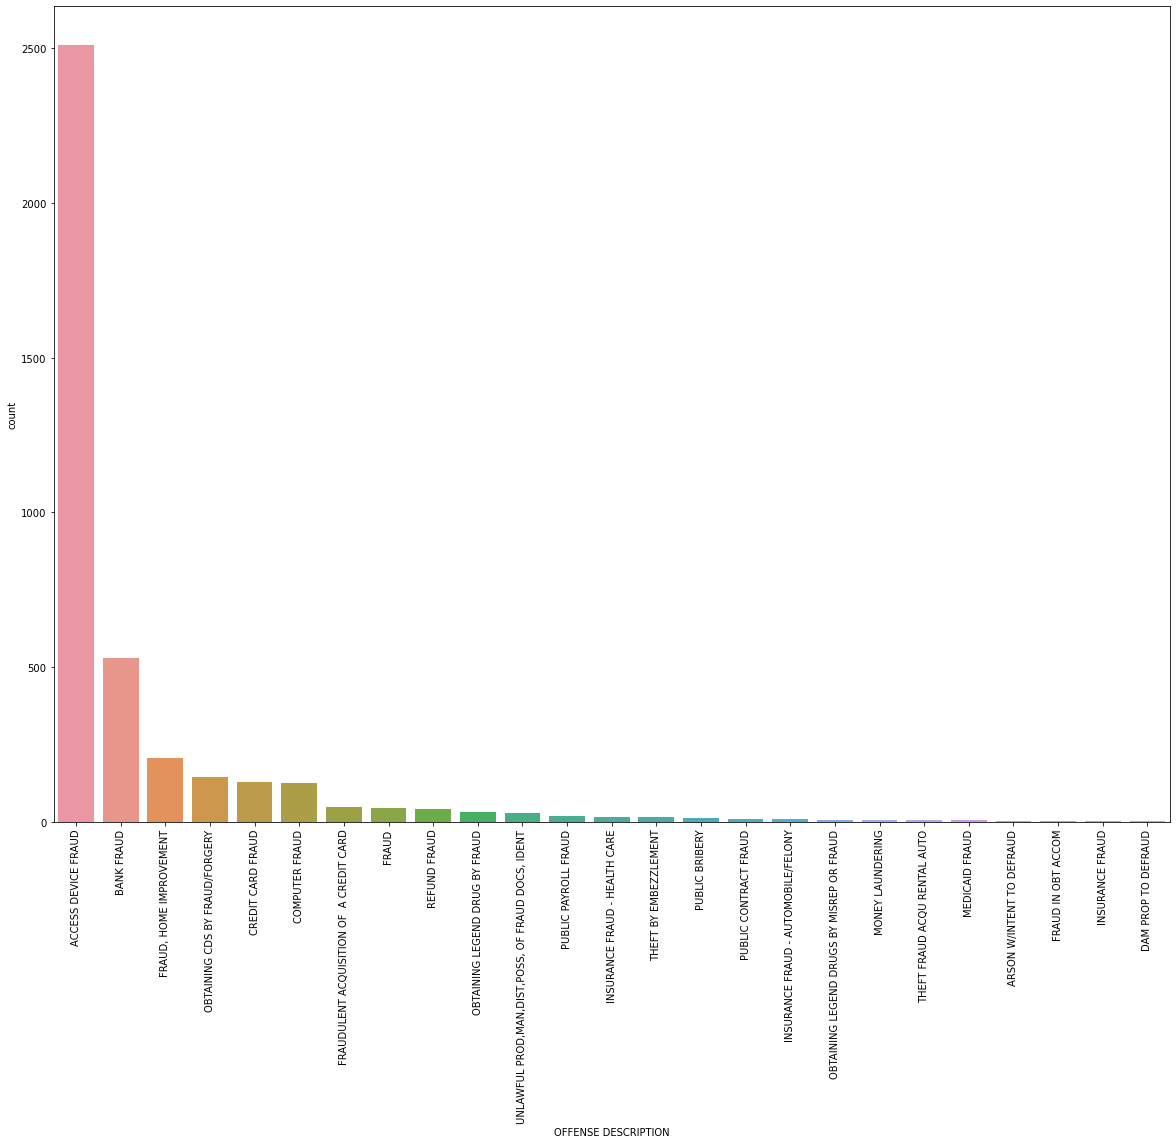

In [63]:
plt.figure(figsize = (20,15))
ax=sns.countplot(financial_crimes['OFFENSE DESCRIPTION'], order = financial_crimes['OFFENSE DESCRIPTION'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)